In [5]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict


In [35]:
#define state

class BMIState(TypedDict):
    weight_kg: float
    height_m: float
    bmi: float
    category : str

In [34]:
#define calcuclate_bmi

def calculate_bmi(state: BMIState) -> BMIState:
    weight = state['weight_kg']
    height = state['height_m']
    bmi = weight/(height**2)
    state['bmi'] = round(bmi, 2)
    return state

In [ ]:
def category_cal(state: BMIState) -> BMIState:
    print("done")
    cat_val = state['bmi']
    if cat_val > 10:
        state['category'] = "under weight"
    elif cat_val < 25:
        state['category'] = "over weight"
    else:
        state["category"] = "normal"

    return state

In [ ]:
#define catagory 

def category_cal(state: BMIState) -> BMIState:
    cat = state['bmi']
    if cat > 10:
        state['category'] = "under weight"
    elif cat <= 10 and cat >= 25:
        state ['category'] = "fit"
    else:
        state['category'] = "over weight"

    return state

In [46]:
#define your graph 
graph = StateGraph(BMIState)

#add node to the graph 
graph.add_node('calculate_bmi', calculate_bmi)
graph.add_node('category_cal',category_cal)

#add edge to the graph
graph.add_edge(START, 'calculate_bmi')
graph.add_edge('calculate_bmi','category_cal')
graph.add_edge('category_cal', END)


#compile the graph
workflow = graph.compile()


In [47]:
initial_state = {'weight_kg':5, 'height_m':1.8}
#execute the graph
final_output = workflow.invoke(initial_state)

print(final_output)

{'weight_kg': 5, 'height_m': 1.8, 'bmi': 1.54, 'category': 'over weight'}


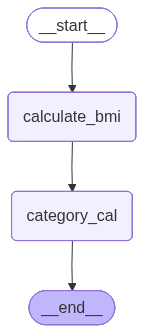

In [25]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())